In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# AISC2007IAE1BYGROUP3

## MECE REPORT

| Model                                             | Team Member            | Role                         |
|---------------------------------------------------|------------------------|------------------------------|
|---------------------------------------------------|------------------------|------------------------------|
|---------------------------------------------------|------------------------|------------------------------|
|---------------------------------------------------|------------------------|------------------------------|
|---------------------------------------------------|------------------------|------------------------------|
|---------------------------------------------------|------------------------|------------------------------|
|---------------------------------------------------|------------------------|------------------------------|
|---------------------------------------------------|------------------------|------------------------------|
|---------------------------------------------------|------------------------|------------------------------|
|---------------------------------------------------|------------------------|------------------------------|
|---------------------------------------------------|------------------------|------------------------------|


## Merging json files

#### Importing necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
file_path = 'yelp_dataset/yelp_academic_dataset_user.json'

chunks = []

# Read the JSON file in chunks
for chunk in pd.read_json(file_path, lines=True, chunksize=10000):
    chunks.append(chunk)

# Concate all chunks into a single DataFrame
user_df_main = pd.concat(chunks, ignore_index=True)

FileNotFoundError: File yelp_dataset/yelp_academic_dataset_user.json does not exist

In [ ]:
file_path = 'yelp_dataset/yelp_academic_dataset_business.json'

business_chunks = []

# Read the JSON file in chunks
for chunk in pd.read_json(file_path, lines=True, chunksize=10000):
    business_chunks.append(chunk)

# Concate all chunks into a single DataFrame
business_df_main = pd.concat(business_chunks, ignore_index=True)

FileNotFoundError: File yelp_dataset/yelp_academic_dataset_business.json does not exist

In [ ]:
file_path = 'yelp_dataset/yelp_academic_dataset_review.json'

# Initialize an empty list to store chunks
review_chunks = []

# Read the JSON file in chunks
for chunk in pd.read_json(file_path, lines=True, chunksize=10000):
    review_chunks.append(chunk)

# Concate all chunks into a single DataFrame
review_df_main = pd.concat(review_chunks, ignore_index=True)

In [ ]:
# row_size = 10
# review_df = review_df[:row_size]
# business_df = business_df[:row_size]
# user_df = user_df[:row_size]

In [ ]:
business_df_main.shape

(150346, 14)

In [ ]:
review_df_main.shape

(6990280, 9)

In [ ]:
user_df_main.shape

(1987897, 22)

# PreProcessing Business DF

In [ ]:
business_df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [ ]:
business_df_main['attributes']

0                             {'ByAppointmentOnly': 'True'}
1                    {'BusinessAcceptsCreditCards': 'True'}
2         {'BikeParking': 'True', 'BusinessAcceptsCredit...
3         {'RestaurantsDelivery': 'False', 'OutdoorSeati...
4         {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
                                ...                        
150341    {'ByAppointmentOnly': 'False', 'RestaurantsPri...
150342    {'BusinessAcceptsCreditCards': 'True', 'Restau...
150343    {'RestaurantsPriceRange2': '1', 'BusinessAccep...
150344    {'BusinessParking': '{'garage': False, 'street...
150345    {'WheelchairAccessible': 'True', 'BusinessAcce...
Name: attributes, Length: 150346, dtype: object

let's convert this dictionary to features

In [ ]:
#Creating a DataFrame with binary indicators for each attribute
attributes_df = pd.json_normalize(business_df_main['attributes'])

# Concatenate the new attributes DataFrame with the business features
business_df_main = pd.concat([business_df_main, attributes_df], axis=1)

business_df_main.head()

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  ...  AcceptsInsurance  \
0  34.426679 -119.711197    5.0             7  ...               NaN   
1  38.551126  -90.335695    3.0            15  ...               NaN   
2  32.223236 -110.880452    3.5            22  ...               NaN   
3  39.955505  -75.155564    4.0            80  ...               NaN   
4  40.338183  -75.471659    4.5            13  ...               NaN   

  BestNights BYOB Corkage BYOBCorkage HairSpecializesIn Open24Hours  \
0        NaN  NaN     NaN         NaN               NaN         NaN   
1        NaN  NaN     NaN         NaN               NaN         NaN   
2        NaN  NaN     NaN         NaN               NaN         NaN   
3        NaN  NaN     NaN         NaN               NaN         NaN   
4        NaN  NaN     NaN         NaN               NaN         NaN   

  RestaurantsCounterService AgesAllowed DietaryRestrictions  
0                       NaN         NaN                 NaN  
1                       NaN         NaN                 NaN  
2                       NaN         NaN                 NaN  
3                       NaN         NaN                 NaN  
4                       NaN         NaN                 NaN  

[5 rows x 53 columns]

In [ ]:
business_df_main.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'ByAppointmentOnly',
       'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsPriceRange2',
       'CoatCheck', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Caters',
       'WiFi', 'BusinessParking', 'WheelchairAccessible', 'HappyHour',
       'OutdoorSeating', 'HasTV', 'RestaurantsReservations', 'DogsAllowed',
       'Alcohol', 'GoodForKids', 'RestaurantsAttire', 'Ambience',
       'RestaurantsTableService', 'RestaurantsGoodForGroups', 'DriveThru',
       'NoiseLevel', 'GoodForMeal', 'BusinessAcceptsBitcoin', 'Smoking',
       'Music', 'GoodForDancing', 'AcceptsInsurance', 'BestNights', 'BYOB',
       'Corkage', 'BYOBCorkage', 'HairSpecializesIn', 'Open24Hours',
       'RestaurantsCounterService', 'AgesAllowed', 'DietaryRestrictions'],
      dtype='object')

In [ ]:
business_df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   name                        150346 non-null  object 
 2   address                     150346 non-null  object 
 3   city                        150346 non-null  object 
 4   state                       150346 non-null  object 
 5   postal_code                 150346 non-null  object 
 6   latitude                    150346 non-null  float64
 7   longitude                   150346 non-null  float64
 8   stars                       150346 non-null  float64
 9   review_count                150346 non-null  int64  
 10  is_open                     150346 non-null  int64  
 11  attributes                  136602 non-null  object 
 12  categories                  150243 non-null  object 
 13  hours         

In [ ]:
(business_df_main.isnull().sum()*100)/business_df_main.shape[0]

business_id                    0.000000
name                           0.000000
address                        0.000000
city                           0.000000
state                          0.000000
postal_code                    0.000000
latitude                       0.000000
longitude                      0.000000
stars                          0.000000
review_count                   0.000000
is_open                        0.000000
attributes                     9.141580
categories                     0.068509
hours                         15.446370
ByAppointmentOnly             71.838958
BusinessAcceptsCreditCards    20.340415
BikeParking                   51.686111
RestaurantsPriceRange2        43.254892
CoatCheck                     96.285901
RestaurantsTakeOut            60.187168
RestaurantsDelivery           62.565017
Caters                        73.310231
WiFi                          62.144653
BusinessParking               39.416413
WheelchairAccessible          80.742421


In [ ]:
#Deleting columns having null values >= 50%
threshold = 0.5 * len(business_df_main)

# Drop columns with null values >= 50%
business_df_cleaned = business_df_main.dropna(thresh=threshold, axis=1)

In [ ]:
business_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   name                        150346 non-null  object 
 2   address                     150346 non-null  object 
 3   city                        150346 non-null  object 
 4   state                       150346 non-null  object 
 5   postal_code                 150346 non-null  object 
 6   latitude                    150346 non-null  float64
 7   longitude                   150346 non-null  float64
 8   stars                       150346 non-null  float64
 9   review_count                150346 non-null  int64  
 10  is_open                     150346 non-null  int64  
 11  attributes                  136602 non-null  object 
 12  categories                  150243 non-null  object 
 13  hours         

In [ ]:
business_df_cleaned['categories']

0         Doctors, Traditional Chinese Medicine, Naturop...
1         Shipping Centers, Local Services, Notaries, Ma...
2         Department Stores, Shopping, Fashion, Home & G...
3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
                                ...                        
150341                           Nail Salons, Beauty & Spas
150342    Pets, Nurseries & Gardening, Pet Stores, Hobby...
150343    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150344    Fitness/Exercise Equipment, Eyewear & Optician...
150345    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 150346, dtype: object

In [ ]:
#One Hot Encoding Top 10 categories

#Splitting the categories into separate items
business_df_cleaned['categories_split'] = business_df_cleaned['categories'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

#Getting the top 10 most common categories
all_categories = business_df_cleaned['categories_split'].explode()  # Flatten the list of categories
top_10_categories = all_categories.value_counts().head(10).index.tolist()

#One-hot encoding the top 10 categories
for category in top_10_categories:
    business_df_cleaned[category] = business_df_cleaned['categories_split'].apply(lambda x: 1 if category in x else 0)

#Dropping the temporary 'categories_split' column
business_df_cleaned = business_df_cleaned.drop(columns=['categories_split'])

business_df_cleaned.head()


business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  ...  Restaurants Food Shopping  \
0  34.426679 -119.711197    5.0             7  ...            0    0        0   
1  38.551126  -90.335695    3.0            15  ...            0    0        0   
2  32.223236 -110.880452    3.5            22  ...            0    0        1   
3  39.955505  -75.155564    4.0            80  ...            1    1        0   
4  40.338183  -75.471659    4.5            13  ...            0    1        0   

  Home Services Beauty & Spas Nightlife Health & Medical  Local Services  \
0             0             0         0                1               0   
1             0             0         0                0               1   
2             0             0         0                0               0   
3             0             0         0                0               0   
4             0             0         0                0               0   

   Bars  Automotive  
0     0           0  
1     0           0  
2     0           0  
3     0           0  
4     0           0  

[5 rows x 27 columns]

In [ ]:
business_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   name                        150346 non-null  object 
 2   address                     150346 non-null  object 
 3   city                        150346 non-null  object 
 4   state                       150346 non-null  object 
 5   postal_code                 150346 non-null  object 
 6   latitude                    150346 non-null  float64
 7   longitude                   150346 non-null  float64
 8   stars                       150346 non-null  float64
 9   review_count                150346 non-null  int64  
 10  is_open                     150346 non-null  int64  
 11  attributes                  136602 non-null  object 
 12  categories                  150243 non-null  object 
 13  hours         

In [ ]:
#Dropping unnecessary columns
#Not deleting Id column for mreging with other dataframe
business_df_cleaned = business_df_cleaned.drop(columns=['name', 'address', 'attributes', 'categories', 'hours','city','postal_code'])
business_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   city                        150346 non-null  object 
 2   state                       150346 non-null  object 
 3   postal_code                 150346 non-null  object 
 4   latitude                    150346 non-null  float64
 5   longitude                   150346 non-null  float64
 6   stars                       150346 non-null  float64
 7   review_count                150346 non-null  int64  
 8   is_open                     150346 non-null  int64  
 9   BusinessAcceptsCreditCards  119765 non-null  object 
 10  RestaurantsPriceRange2      85314 non-null   object 
 11  BusinessParking             91085 non-null   object 
 12  Restaurants                 150346 non-null  int64  
 13  Food          

In [ ]:
business_df_cleaned.head()

business_id           city state postal_code   latitude  \
0  Pns2l4eNsfO8kk83dixA6A  Santa Barbara    CA       93101  34.426679   
1  mpf3x-BjTdTEA3yCZrAYPw         Affton    MO       63123  38.551126   
2  tUFrWirKiKi_TAnsVWINQQ         Tucson    AZ       85711  32.223236   
3  MTSW4McQd7CbVtyjqoe9mw   Philadelphia    PA       19107  39.955505   
4  mWMc6_wTdE0EUBKIGXDVfA     Green Lane    PA       18054  40.338183   

    longitude  stars  review_count  is_open BusinessAcceptsCreditCards  ...  \
0 -119.711197    5.0             7        0                        NaN  ...   
1  -90.335695    3.0            15        1                       True  ...   
2 -110.880452    3.5            22        0                       True  ...   
3  -75.155564    4.0            80        1                      False  ...   
4  -75.471659    4.5            13        1                       True  ...   

  Restaurants Food  Shopping  Home Services  Beauty & Spas  Nightlife  \
0           0    0         0              0              0          0   
1           0    0         0              0              0          0   
2           0    0         1              0              0          0   
3           1    1         0              0              0          0   
4           0    1         0              0              0          0   

   Health & Medical  Local Services  Bars  Automotive  
0                 1               0     0           0  
1                 0               1     0           0  
2                 0               0     0           0  
3                 0               0     0           0  
4                 0               0     0           0  

[5 rows x 22 columns]

In [ ]:
business_df_cleaned['BusinessAcceptsCreditCards'].value_counts()

BusinessAcceptsCreditCards
True     113667
False      6025
None         73
Name: count, dtype: int64

In [ ]:
#Imputing null values and False = 0, and True = 1 in 'BusinessAcceptsCreditCards'

#Replace True with 1 and False with 0
business_df_cleaned['BusinessAcceptsCreditCards'] = business_df_cleaned['BusinessAcceptsCreditCards'].map({'True': 1, 'False': 0})

# Impute None (NaN) with 0
business_df_cleaned['BusinessAcceptsCreditCards'] = business_df_cleaned['BusinessAcceptsCreditCards'].fillna(0)

# Convert column to integer
business_df_cleaned['BusinessAcceptsCreditCards'] = business_df_cleaned['BusinessAcceptsCreditCards'].astype(int)

business_df_cleaned['BusinessAcceptsCreditCards'].value_counts()


BusinessAcceptsCreditCards
1    113667
0     36679
Name: count, dtype: int64

In [ ]:
business_df_cleaned['RestaurantsPriceRange2'].value_counts()

RestaurantsPriceRange2
2       48581
1       28840
3        6667
4        1192
None       34
Name: count, dtype: int64

In [ ]:
#Dropping the NAN values
business_df_cleaned['RestaurantsPriceRange2'] = business_df_cleaned['RestaurantsPriceRange2'].replace({'None': np.nan})
business_df_cleaned = business_df_cleaned.dropna(subset=['RestaurantsPriceRange2'])
business_df_cleaned['RestaurantsPriceRange2'].value_counts()

RestaurantsPriceRange2
2    48581
1    28840
3     6667
4     1192
Name: count, dtype: int64

In [ ]:
business_df_cleaned['BusinessParking'].value_counts()

BusinessParking
{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}        29909
{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}       19399
{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}        12086
{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}          4477
None                                                                                        1804
                                                                                           ...  
{u'garage': False, u'street': True, u'validated': False, u'lot': True, u'valet': False}        1
{u'valet': False, u'garage': None, u'street': True, u'lot': None, u'validated': True}          1
{'garage': False, 'street': None, 'validated': False, 'lot': None, 'valet': True}              1
{u'valet': True, u'garage': False, u'street': True, u'lot': True, u'validated': True}          1
{u'valet': Fal

In [ ]:
#One-Hot Encoding the 'BusinessParking' column
#Normalize the column into a DataFrame
#parking_df = pd.json_normalize(business_df_cleaned['BusinessParking'].dropna())

#if parking_df.empty:
 #   print("No valid entries found in 'BusinessParking' after normalization.")
#else:
    # Step 2: One-hot encode the DataFrame
 #   one_hot_encoded = pd.get_dummies(parking_df, prefix='', prefix_sep='')

    # Step 3: Concatenate the original DataFrame with the one-hot encoded DataFrame
  #  business_df_cleaned = pd.concat([business_df_cleaned.drop(columns=['BusinessParking']), one_hot_encoded], axis=1)

#business_df_cleaned.info()

In [ ]:
#Not able to one-hot encode the column, hencedropping it
business_df_cleaned = business_df_cleaned.drop(columns=['BusinessParking'])
business_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85280 entries, 2 to 150345
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 85280 non-null  object 
 1   city                        85280 non-null  object 
 2   state                       85280 non-null  object 
 3   postal_code                 85280 non-null  object 
 4   latitude                    85280 non-null  float64
 5   longitude                   85280 non-null  float64
 6   stars                       85280 non-null  float64
 7   review_count                85280 non-null  int64  
 8   is_open                     85280 non-null  int64  
 9   BusinessAcceptsCreditCards  85280 non-null  int32  
 10  RestaurantsPriceRange2      85280 non-null  object 
 11  Restaurants                 85280 non-null  int64  
 12  Food                        85280 non-null  int64  
 13  Shopping                    85280 n

In [ ]:
business_df_cleaned['stars'] = business_df_cleaned['stars'].astype(object)
business_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85280 entries, 2 to 150345
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 85280 non-null  object 
 1   city                        85280 non-null  object 
 2   state                       85280 non-null  object 
 3   postal_code                 85280 non-null  object 
 4   latitude                    85280 non-null  float64
 5   longitude                   85280 non-null  float64
 6   stars                       85280 non-null  object 
 7   review_count                85280 non-null  int64  
 8   is_open                     85280 non-null  int64  
 9   BusinessAcceptsCreditCards  85280 non-null  int32  
 10  RestaurantsPriceRange2      85280 non-null  object 
 11  Restaurants                 85280 non-null  int64  
 12  Food                        85280 non-null  int64  
 13  Shopping                    85280 n

In [ ]:
business_df_cleaned.rename(columns={'review_count': 'business_review_count'}, inplace=True)

In [ ]:
business_main= business_df_cleaned.copy()
business_main.head()

business_id          city state postal_code   latitude  \
2  tUFrWirKiKi_TAnsVWINQQ        Tucson    AZ       85711  32.223236   
3  MTSW4McQd7CbVtyjqoe9mw  Philadelphia    PA       19107  39.955505   
5  CF33F8-E6oudUQ46HnavjQ  Ashland City    TN       37015  36.269593   
6  n_0UpQx1hsNbnPUSlodU8w     Brentwood    MO       63144  38.627695   
8  k0hlBqXX-Bt0vf1op7Jr1w        Affton    MO       63123  38.565165   

    longitude stars  business_review_count  is_open  \
2 -110.880452   3.5                     22        0   
3  -75.155564   4.0                     80        1   
5  -87.058943   2.0                      6        1   
6  -90.340465   2.5                     13        1   
8  -90.321087   3.0                     19        0   

   BusinessAcceptsCreditCards  ... Restaurants  Food  Shopping  Home Services  \
2                           1  ...           0     0         1              0   
3                           0  ...           1     1         0              0   
5                           1  ...           1     1         0              0   
6                           1  ...           0     0         1              0   
8                           1  ...           1     0         0              0   

   Beauty & Spas  Nightlife  Health & Medical  Local Services  Bars  \
2              0          0                 0               0     0   
3              0          0                 0               0     0   
5              0          0                 0               0     0   
6              0          0                 0               0     0   
8              0          1                 0               0     1   

   Automotive  
2           0  
3           0  
5           0  
6           0  
8           0  

[5 rows x 21 columns]

# PreProcessing Review Json

In [ ]:
review_df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB


In [ ]:
#Dropping unnecessary columns
review_df_cleaned = review_df_main.drop(columns=['text', 'date'])
review_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   useful       int64 
 5   funny        int64 
 6   cool         int64 
dtypes: int64(4), object(3)
memory usage: 373.3+ MB


In [ ]:
(review_df_cleaned.isnull().sum()*100)/review_df_cleaned.shape[0]

review_id      0.0
user_id        0.0
business_id    0.0
stars          0.0
useful         0.0
funny          0.0
cool           0.0
dtype: float64

In [ ]:
review_df_cleaned.rename(columns={'stars': 'review_stars'}, inplace=True)

In [ ]:
review_df_cleaned['review_stars'] = review_df_cleaned['review_stars'].astype(object)
review_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   review_id     object
 1   user_id       object
 2   business_id   object
 3   review_stars  object
 4   useful        int64 
 5   funny         int64 
 6   cool          int64 
dtypes: int64(3), object(4)
memory usage: 373.3+ MB


In [ ]:
review_main = review_df_cleaned.copy()
review_main.head()

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

  review_stars  useful  funny  cool  
0            3       0      0     0  
1            5       1      0     1  
2            3       0      0     0  
3            5       1      0     1  
4            4       1      0     1

# PreProcssing User Json

In [ ]:
user_df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


In [ ]:
(user_df_main.isnull().sum()*100)/user_df_main.shape[0]

user_id               0.0
name                  0.0
review_count          0.0
yelping_since         0.0
useful                0.0
funny                 0.0
cool                  0.0
elite                 0.0
friends               0.0
fans                  0.0
average_stars         0.0
compliment_hot        0.0
compliment_more       0.0
compliment_profile    0.0
compliment_cute       0.0
compliment_list       0.0
compliment_note       0.0
compliment_plain      0.0
compliment_cool       0.0
compliment_funny      0.0
compliment_writer     0.0
compliment_photos     0.0
dtype: float64

In [ ]:
user_df_main.head()

user_id    name  review_count        yelping_since  useful  \
0  qVc8ODYU5SZjKXVBgXdI7w  Walker           585  2007-01-25 16:47:26    7217   
1  j14WgRoU_-2ZE1aw1dXrJg  Daniel          4333  2009-01-25 04:35:42   43091   
2  2WnXYQFK0hXEoTxPtV2zvg   Steph           665  2008-07-25 10:41:00    2086   
3  SZDeASXq7o05mMNLshsdIA    Gwen           224  2005-11-29 04:38:33     512   
4  hA5lMy-EnncsH4JoR-hFGQ   Karen            79  2007-01-05 19:40:59      29   

   funny   cool                                              elite  \
0   1259   5994                                               2007   
1  13066  27281  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2   1010   1003                           2009,2010,2011,2012,2013   
3    330    299                                     2009,2010,2011   
4     15      7                                                      

                                             friends  fans  ...  \
0  NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267  ...   
1  ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  3138  ...   
2  LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...    52  ...   
3  enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...    28  ...   
4  PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...     1  ...   

   compliment_more  compliment_profile  compliment_cute  compliment_list  \
0               65                  55               56               18   
1              264                 184              157              251   
2               13                  10               17                3   
3                4                   1                6                2   
4                1                   0                0                0   

   compliment_note  compliment_plain  compliment_cool  compliment_funny  \
0              232               844              467               467   
1             1847              7054             3131              3131   
2               66                96              119               119   
3               12                16               26                26   
4                1                 1                0                 0   

   compliment_writer  compliment_photos  
0                239                180  
1               1521               1946  
2                 35                 18  
3                 10                  9  
4                  0                  0  

[5 rows x 22 columns]

In [ ]:
#Dropping Unnecessary columns
user_df_cleaned = user_df_main.drop(columns=['elite', 'friends', 'yelping_since'])
user_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   useful              int64  
 4   funny               int64  
 5   cool                int64  
 6   fans                int64  
 7   average_stars       float64
 8   compliment_hot      int64  
 9   compliment_more     int64  
 10  compliment_profile  int64  
 11  compliment_cute     int64  
 12  compliment_list     int64  
 13  compliment_note     int64  
 14  compliment_plain    int64  
 15  compliment_cool     int64  
 16  compliment_funny    int64  
 17  compliment_writer   int64  
 18  compliment_photos   int64  
dtypes: float64(1), int64(16), object(2)
memory usage: 288.2+ MB


In [ ]:
user_df_cleaned.rename(columns={'name': 'user_name'}, inplace=True)
user_df_cleaned.rename(columns={'review_count': 'user_review_count'}, inplace=True)
user_df_cleaned.rename(columns={'useful': 'user_useful'}, inplace=True)
user_df_cleaned.rename(columns={'funny': 'user_funny'}, inplace=True)
user_df_cleaned.rename(columns={'cool': 'user_cool'}, inplace=True)

user_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   user_name           object 
 2   user_review_count   int64  
 3   user_useful         int64  
 4   user_funny          int64  
 5   user_cool           int64  
 6   fans                int64  
 7   average_stars       float64
 8   compliment_hot      int64  
 9   compliment_more     int64  
 10  compliment_profile  int64  
 11  compliment_cute     int64  
 12  compliment_list     int64  
 13  compliment_note     int64  
 14  compliment_plain    int64  
 15  compliment_cool     int64  
 16  compliment_funny    int64  
 17  compliment_writer   int64  
 18  compliment_photos   int64  
dtypes: float64(1), int64(16), object(2)
memory usage: 288.2+ MB


In [ ]:
user_main = user_df_cleaned.copy()
user_main.head()

user_id user_name  user_review_count  user_useful  \
0  qVc8ODYU5SZjKXVBgXdI7w    Walker                585         7217   
1  j14WgRoU_-2ZE1aw1dXrJg    Daniel               4333        43091   
2  2WnXYQFK0hXEoTxPtV2zvg     Steph                665         2086   
3  SZDeASXq7o05mMNLshsdIA      Gwen                224          512   
4  hA5lMy-EnncsH4JoR-hFGQ     Karen                 79           29   

   user_funny  user_cool  fans  average_stars  compliment_hot  \
0        1259       5994   267           3.91             250   
1       13066      27281  3138           3.74            1145   
2        1010       1003    52           3.32              89   
3         330        299    28           4.27              24   
4          15          7     1           3.54               1   

   compliment_more  compliment_profile  compliment_cute  compliment_list  \
0               65                  55               56               18   
1              264                 184              157              251   
2               13                  10               17                3   
3                4                   1                6                2   
4                1                   0                0                0   

   compliment_note  compliment_plain  compliment_cool  compliment_funny  \
0              232               844              467               467   
1             1847              7054             3131              3131   
2               66                96              119               119   
3               12                16               26                26   
4                1                 1                0                 0   

   compliment_writer  compliment_photos  
0                239                180  
1               1521               1946  
2                 35                 18  
3                 10                  9  
4                  0                  0

Limit the data

In [ ]:
# Filter out first 50,000 unique business_ids from review_df
unique_business_ids = review_main['business_id'].unique()[:10000]

# Filter review_df to keep records for filtered ids
review_final = review_main[review_main['business_id'].isin(unique_business_ids)]

# Filter business_df
business_final = business_main[business_main['business_id'].isin(unique_business_ids)]

# Filter user_df
filtered_user_ids = review_final['user_id'].unique()
user_final = user_main[user_main['user_id'].isin(filtered_user_ids)]

In [ ]:
business_final['business_id'].unique().shape[0]

7054

In [ ]:
review_final['business_id'].unique().shape[0]

10000

In [ ]:
review_final['user_id'].unique().shape[0]

384067

In [ ]:
user_final['user_id'].unique().shape[0]

384064

In [ ]:
print(review_final.shape)
print(business_final.shape)
print(user_final.shape)

(630749, 7)
(7054, 21)
(384064, 19)


In [ ]:
review_final.columns

Index(['review_id', 'user_id', 'business_id', 'review_stars', 'useful',
       'funny', 'cool'],
      dtype='object')

User data

In [ ]:
# Calculate total compliments
user_final['total_compliments'] = user_final[['compliment_hot', 'compliment_more', 'compliment_profile',
                                          'compliment_cute', 'compliment_list', 'compliment_note',
                                          'compliment_plain', 'compliment_cool', 'compliment_funny',
                                          'compliment_writer', 'compliment_photos']].sum(axis=1)

# Calculate compliments to reviews ratio
user_final['compliments_to_reviews_ratio'] = user_final['total_compliments'] / user_final['user_review_count'].replace(0, 1)

# Optionally drop individual compliment columns if no longer needed
user_final.drop(columns=[
    'compliment_hot', 'compliment_more', 'compliment_profile',
    'compliment_cute', 'compliment_list', 'compliment_note',
    'compliment_plain', 'compliment_cool', 'compliment_funny',
    'compliment_writer', 'compliment_photos'
], inplace=True)

# Check the updated user DataFrame
user_final.head()

user_id user_name  user_review_count  user_useful  \
0  qVc8ODYU5SZjKXVBgXdI7w    Walker                585         7217   
1  j14WgRoU_-2ZE1aw1dXrJg    Daniel               4333        43091   
2  2WnXYQFK0hXEoTxPtV2zvg     Steph                665         2086   
3  SZDeASXq7o05mMNLshsdIA      Gwen                224          512   
4  hA5lMy-EnncsH4JoR-hFGQ     Karen                 79           29   

   user_funny  user_cool  fans  average_stars  total_compliments  \
0        1259       5994   267           3.91               2873   
1       13066      27281  3138           3.74              20631   
2        1010       1003    52           3.32                585   
3         330        299    28           4.27                136   
4          15          7     1           3.54                  4   

   compliments_to_reviews_ratio  
0                      4.911111  
1                      4.761366  
2                      0.879699  
3                      0.607143  
4                      0.050633

Business Cleaning

In [ ]:
review_final.columns

Index(['review_id', 'user_id', 'business_id', 'review_stars', 'useful',
       'funny', 'cool'],
      dtype='object')

In [ ]:
business_final.columns

Index(['business_id', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'stars', 'business_review_count', 'is_open',
       'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'Restaurants',
       'Food', 'Shopping', 'Home Services', 'Beauty & Spas', 'Nightlife',
       'Health & Medical', 'Local Services', 'Bars', 'Automotive'],
      dtype='object')

In [ ]:
user_final.columns

Index(['user_id', 'user_name', 'user_review_count', 'user_useful',
       'user_funny', 'user_cool', 'fans', 'average_stars', 'total_compliments',
       'compliments_to_reviews_ratio'],
      dtype='object')

In [ ]:
# Merge review features with business features
merged_df = review_final.merge(business_final, on='business_id', how='inner')

In [ ]:
# Now, merge the result with user features
final_merged_df = merged_df.merge(user_final, on='user_id', how='inner')

In [ ]:
final_merged_df.shape

(554338, 36)

In [ ]:
final_merged_df.tail()

review_id                 user_id  \
554333  odUrl65690tRTm1hLlwluA  EQpo4kfo8XT_67h7XUHGpA   
554334  jU6Onf-5uEDO1yRKWZ_KJw  pw37auqonHZ0xZMsLEBppw   
554335  D0wNhDLEG8xlJaAHnjmrKg  h_erVp39Nr3tjZxEJk-6NQ   
554336  WKnn4qRMhzfSvMEclHXTqg  rixMfbhUpECMEK4rG2O_fg   
554337  gLN6XZn3mVjSJmfkUAt_HA  oFT-ma2qMXreI9jQLBflsQ   

                   business_id review_stars  useful  funny  cool  \
554333  BjBDHqHhMXSxgyVipccznQ            4       2      0     2   
554334  hn3Rg2JrhQoDJBEhrpuwWg            3       1      0     0   
554335  E8GeMcCv17n30NLL7LZzog            2       4      1     2   
554336  j8JOZvfeHEfUWq3gEz6ABQ            4       1      0     1   
554337  ymoEdJB5NE56sWw74uyX7A            5       1      0     1   

                city state postal_code  ...  Automotive  user_name  \
554333         Tampa    FL       33607  ...           0      James   
554334      Franklin    TN       37067  ...           0       Anne   
554335       Dunedin    FL       34698  ...           0        Tom   
554336   New Orleans    LA       70117  ...           0    Frankie   
554337  Indianapolis    IN       46220  ...           0     Allisa   

       user_review_count  user_useful  user_funny  user_cool fans  \
554333                89          215           8        182    3   
554334               159          306         164        172   15   
554335               338          808         175        423   25   
554336                 8            2           0          1    0   
554337                70           29           5          9    0   

        average_stars  total_compliments  compliments_to_reviews_ratio  
554333           4.43                181                      2.033708  
554334           3.92                 36                      0.226415  
554335           3.44                302                      0.893491  
554336           3.50                  0                      0.000000  
554337           4.58                  7                      0.100000  

[5 rows x 36 columns]

In [ ]:
final_merged_df.describe(include='all')

review_id                 user_id  \
count                   554338                  554338   
unique                  554338                  340871   
top     KU_O5udG6zpxOg-VcAEodg  _BcWyKQL16ndpBdggh2kNA   
freq                         1                     259   
mean                       NaN                     NaN   
std                        NaN                     NaN   
min                        NaN                     NaN   
25%                        NaN                     NaN   
50%                        NaN                     NaN   
75%                        NaN                     NaN   
max                        NaN                     NaN   

                   business_id  review_stars         useful          funny  \
count                   554338      554338.0  554338.000000  554338.000000   
unique                    7054           5.0            NaN            NaN   
top     GBTPC53ZrG1ZBY3DT8Mbcw           5.0            NaN            NaN   
freq                      4661      246376.0            NaN            NaN   
mean                       NaN           NaN       1.056758       0.324019   
std                        NaN           NaN       2.507847       1.405366   
min                        NaN           NaN       0.000000       0.000000   
25%                        NaN           NaN       0.000000       0.000000   
50%                        NaN           NaN       0.000000       0.000000   
75%                        NaN           NaN       1.000000       0.000000   
max                        NaN           NaN     179.000000     254.000000   

                 cool          city   state postal_code  ...     Automotive  \
count   554338.000000        554338  554338      554338  ...  554338.000000   
unique            NaN           490      16         972  ...            NaN   
top               NaN  Philadelphia      PA       70130  ...            NaN   
freq              NaN         84800  130785       31141  ...            NaN   
mean         0.491440           NaN     NaN         NaN  ...       0.003119   
std          1.883208           NaN     NaN         NaN  ...       0.055761   
min          0.000000           NaN     NaN         NaN  ...       0.000000   
25%          0.000000           NaN     NaN         NaN  ...       0.000000   
50%          0.000000           NaN     NaN         NaN  ...       0.000000   
75%          0.000000           NaN     NaN         NaN  ...       0.000000   
max        164.000000           NaN     NaN         NaN  ...       1.000000   

        user_name  user_review_count    user_useful     user_funny  \
count      554338      554338.000000  554338.000000  554338.000000   
unique      37309                NaN            NaN            NaN   
top          John                NaN            NaN            NaN   
freq         5295                NaN            NaN            NaN   
mean          NaN         130.689563     438.603421     178.674058   
std           NaN         356.107707    3050.217025    1821.281604   
min           NaN           0.000000       0.000000       0.000000   
25%           NaN           8.000000       4.000000       0.000000   
50%           NaN          28.000000      22.000000       4.000000   
75%           NaN         109.000000     128.000000      29.000000   
max           NaN       17473.000000  206296.000000  185823.000000   

            user_cool           fans  average_stars  total_compliments  \
count   554338.000000  554338.000000  554338.000000      554338.000000   
unique            NaN            NaN            NaN                NaN   
top               NaN            NaN            NaN                NaN   
freq              NaN            NaN            NaN                NaN   
mean       293.207390      13.978102       3.770245         173.390830   
std       2580.867258      87.356540       0.803754        1826.442666   
min          0.000000       0.000000       1.000000           0.000000   
25%  

In [ ]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554338 entries, 0 to 554337
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_id                     554338 non-null  object 
 1   user_id                       554338 non-null  object 
 2   business_id                   554338 non-null  object 
 3   review_stars                  554338 non-null  object 
 4   useful                        554338 non-null  int64  
 5   funny                         554338 non-null  int64  
 6   cool                          554338 non-null  int64  
 7   city                          554338 non-null  object 
 8   state                         554338 non-null  object 
 9   postal_code                   554338 non-null  object 
 10  latitude                      554338 non-null  float64
 11  longitude                     554338 non-null  float64
 12  stars                         554338 non-nul

In [ ]:
final_merged_df.head()

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
2  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
3  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   
4  JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A  04UD14gamNjLY0IDYVhHJg   

  review_stars  useful  funny  cool          city state postal_code  ...  \
0            3       0      0     0   North Wales    PA       19454  ...   
1            3       0      0     0        Tucson    AZ       85713  ...   
2            5       1      0     1  Philadelphia    PA       19114  ...   
3            4       1      0     1   New Orleans    LA       70119  ...   
4            1       1      2     1  Philadelphia    PA       19147  ...   

   Automotive  user_name user_review_count  user_useful  user_funny  \
0           0    Melanie                33           32           3   
1           0      Debra              1332         1660         675   
2           0       Kyle                 9            1           0   
3           0     Sophia               126           74          20   
4           0          Q                 4            5           7   

   user_cool fans  average_stars  total_compliments  \
0          8    0           4.06                  2   
1       1300   58           4.69                442   
2          1    0           4.78                  1   
3         12    0           2.97                  4   
4          1    0           2.00                  1   

   compliments_to_reviews_ratio  
0                      0.060606  
1                      0.331832  
2                      0.111111  
3                      0.031746  
4                      0.250000  

[5 rows x 36 columns]

In [ ]:
final_merged_df['is_open'].value_counts()

is_open
1    449011
0    105327
Name: count, dtype: int64

In [ ]:
final_merged_df = final_merged_df.drop(columns=['review_id', 'user_id', 'business_id', 'user_name'])
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554338 entries, 0 to 554337
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_stars                  554338 non-null  object 
 1   useful                        554338 non-null  int64  
 2   funny                         554338 non-null  int64  
 3   cool                          554338 non-null  int64  
 4   city                          554338 non-null  object 
 5   state                         554338 non-null  object 
 6   postal_code                   554338 non-null  object 
 7   latitude                      554338 non-null  float64
 8   longitude                     554338 non-null  float64
 9   stars                         554338 non-null  object 
 10  business_review_count         554338 non-null  int64  
 11  is_open                       554338 non-null  int64  
 12  BusinessAcceptsCreditCards    554338 non-nul

In [ ]:
final_merged_df.head()

review_stars  useful  funny  cool          city state postal_code  \
0            3       0      0     0   North Wales    PA       19454   
1            3       0      0     0        Tucson    AZ       85713   
2            5       1      0     1  Philadelphia    PA       19114   
3            4       1      0     1   New Orleans    LA       70119   
4            1       1      2     1  Philadelphia    PA       19147   

    latitude   longitude stars  ...  Bars  Automotive  user_review_count  \
0  40.210196  -75.223639   3.0  ...     0           0                 33   
1  32.207233 -110.980864   3.5  ...     0           0               1332   
2  40.079848  -75.025080   4.0  ...     0           0                  9   
3  29.962102  -90.087958   4.0  ...     1           0                126   
4  39.938013  -75.148131   4.0  ...     0           0                  4   

  user_useful  user_funny  user_cool  fans  average_stars  total_compliments  \
0          32           3          8     0           4.06                  2   
1        1660         675       1300    58           4.69                442   
2           1           0          1     0           4.78                  1   
3          74          20         12     0           2.97                  4   
4           5           7          1     0           2.00                  1   

   compliments_to_reviews_ratio  
0                      0.060606  
1                      0.331832  
2                      0.111111  
3                      0.031746  
4                      0.250000  

[5 rows x 32 columns]

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [7]:
final_merged_df = pd.read_csv('/content/drive/MyDrive/DL/cleaned_data.csv')

# Add pre-processed file here and drop postal_code and city

In [8]:
final_merged_df.drop(columns=['postal_code'],inplace=True)

In [9]:
final_merged_df.drop(columns=['city'],inplace=True)

In [10]:
categorical_features = final_merged_df.select_dtypes(include='object').columns

In [11]:
categorical_features

Index(['state'], dtype='object')

In [12]:
df_encoded = pd.get_dummies(final_merged_df, columns=categorical_features)

In [13]:
df_encoded.head()

review_stars  useful  funny  cool   latitude  longitude  stars  \
0             3       0      0     0  40.210196 -75.223639    3.0   
1             5       1      0     0  29.941958 -90.065261    4.5   
2             3       0      0     0  39.949314 -75.152525    3.5   
3             2       0      0     0  40.210196 -75.223639    3.0   
4             4       2      0     1  40.210196 -75.223639    3.0   

   business_review_count  is_open  BusinessAcceptsCreditCards  ...  state_ID  \
0                    169        1                           1  ...     False   
1                    888        1                           1  ...     False   
2                   1141        0                           1  ...     False   
3                    169        1                           1  ...     False   
4                    169        1                           1  ...     False   

   state_IL  state_IN  state_LA  state_MO  state_NC  state_NJ  state_NV  \
0     False     False     False     False     False     False     False   
1     False     False      True     False     False     False     False   
2     False     False     False     False     False     False     False   
3     False     False     False     False     False     False     False   
4     False     False     False     False     False     False     False   

   state_PA  state_TN  
0      True     False  
1     False     False  
2      True     False  
3      True     False  
4      True     False  

[5 rows x 45 columns]

In [14]:
target_column = 'is_open'  # Update this with your target column name
features = df_encoded.drop(columns=[target_column])
target = df_encoded[target_column].astype(int)  # Ensure the target is integer type

In [15]:
features.shape

(554338, 44)

In [16]:
target.shape

(554338,)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from collections import Counter

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [19]:
print("Class distribution before SMOTE:", Counter(y_train))

Class distribution before SMOTE: Counter({1: 314362, 0: 73674})


In [20]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [21]:
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({1: 314362, 0: 314362})


In [22]:
ada_model = AdaBoostClassifier(n_estimators=200, random_state=42, learning_rate=1.0)
ada_model.fit(X_train_resampled, y_train_resampled)

y_pred_train = ada_model.predict(X_train_resampled)
y_pred_test = ada_model.predict(X_test)

train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report for Test Set:\n", classification_report(y_test, y_pred_test))

Training Accuracy: 0.7918100788263213
Test Accuracy: 0.7573450710153816

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.40      0.53      0.46     31653
           1       0.88      0.81      0.84    134649

    accuracy                           0.76    166302
   macro avg       0.64      0.67      0.65    166302
weighted avg       0.79      0.76      0.77    166302



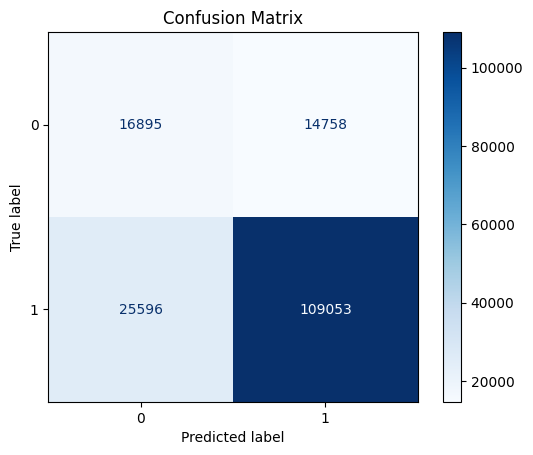

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

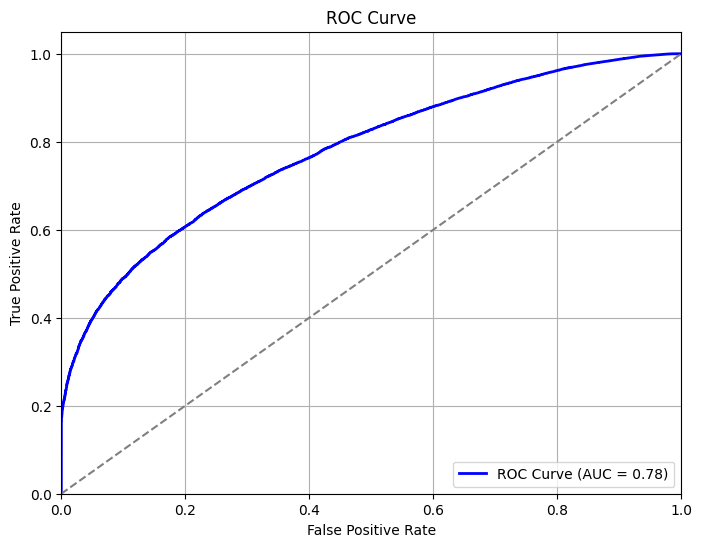

In [24]:
y_proba = ada_model.predict_proba(X_test)[:, 1]  # Probability for class 1
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [25]:
pip install shap

In [26]:
import shap

In [27]:
# 1. Global Interpretability
## Feature Importance
importances = ada_model.feature_importances_
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)


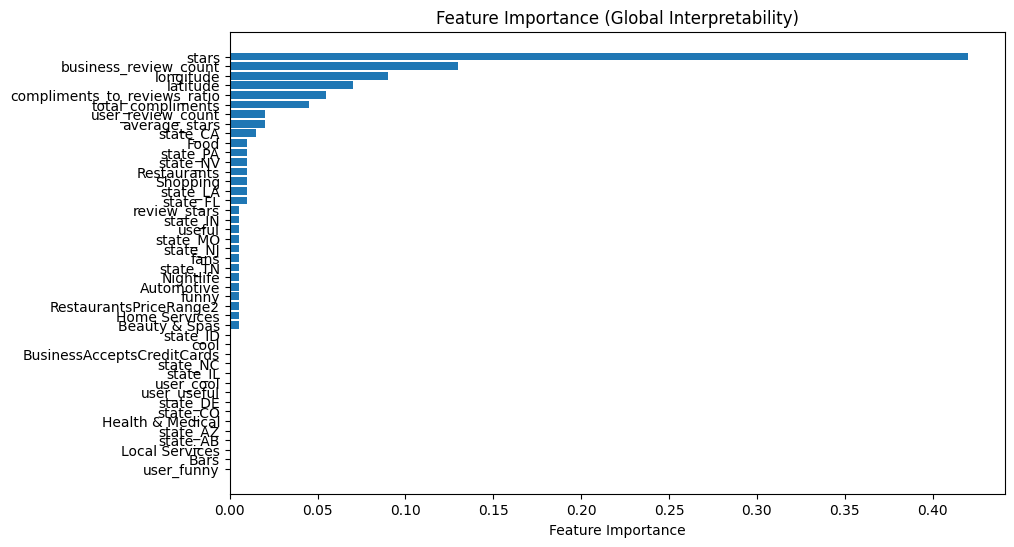

In [28]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Global Interpretability)')
plt.gca().invert_yaxis()
plt.show()

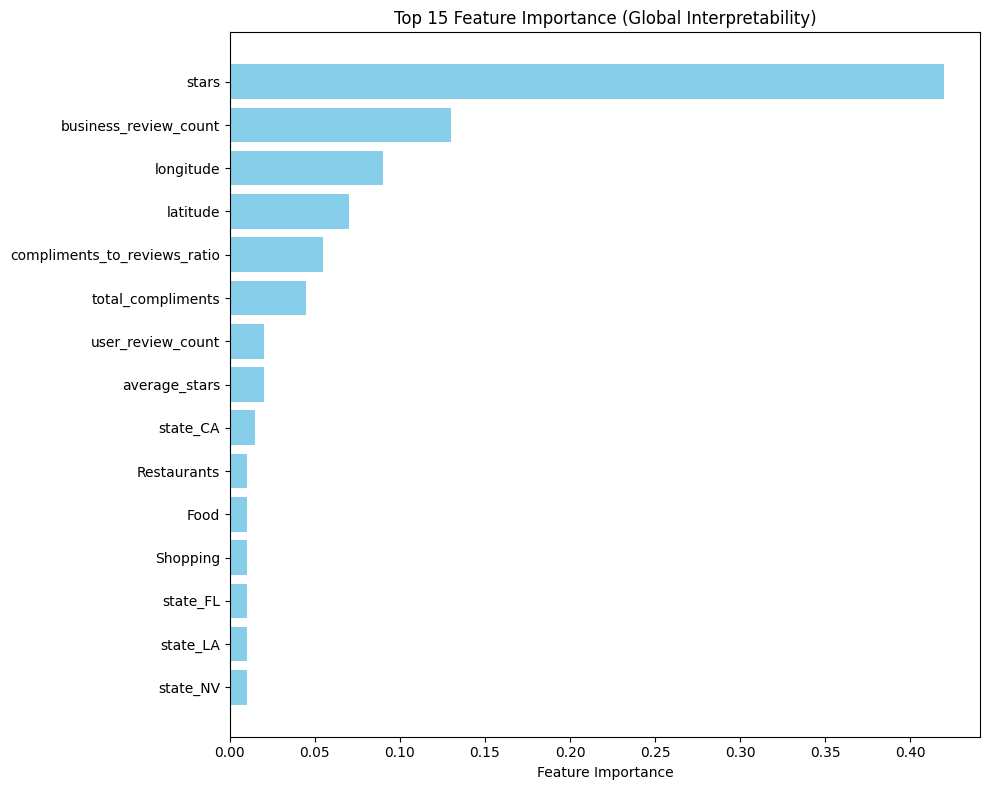

In [29]:
import numpy as np

# Assuming model is your AdaBoostClassifier instance
feature_importances = np.mean([est.feature_importances_ for est in ada_model.estimators_], axis=0)

# Assuming you have feature names
feature_names = features.columns  # Replace with your feature names if available

# Create a dictionary to pair feature names with importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort by importance
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Plotting the top 15 features for better visualization
top_n = 15
top_features = list(sorted_feature_importance.items())[:top_n]
features, importances = zip(*top_features)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importance (Global Interpretability)')
plt.gca().invert_yaxis()  # To have the most important feature on top
plt.tight_layout()
plt.show()


In [30]:
# 2. Local Interpretability with SHAP KernelExplainer
## Using SHAP for local explanations
explainer = shap.KernelExplainer(ada_model.predict_proba, X_train.iloc[:50, :])  # Using a subset for efficiency
shap_values = explainer.shap_values(X_test.iloc[:5, :])  # Calculating SHAP values for the first 5 test samples for demonstration


  0%|          | 0/5 [00:00<?, ?it/s]

In [31]:
shap.initjs()

In [32]:
instance_index = 0
shap_values_mean = np.mean([shap_values[class_idx][instance_index] for class_idx in range(len(shap_values))], axis=0)


In [33]:
X_train_sample = X_train[:5000]

In [34]:
X_test_sample = X_test[:5000]

In [35]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f175ce262e85d158c4cbe0b94a0c8895a8ff681bec77ac325a0f5b823badb234
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [36]:
# Optional: Use LIME for Local Interpretability
from lime import lime_tabular

explainer_lime = lime_tabular.LimeTabularExplainer(X_train_sample.values, feature_names=feature_names, class_names=[0,1], discretize_continuous=True)
i = 125  # Index of the sample you want to explain
exp = explainer_lime.explain_instance(X_test_sample.iloc[i].values, ada_model.predict_proba, num_features=7)
exp.show_in_notebook()

Approach 2

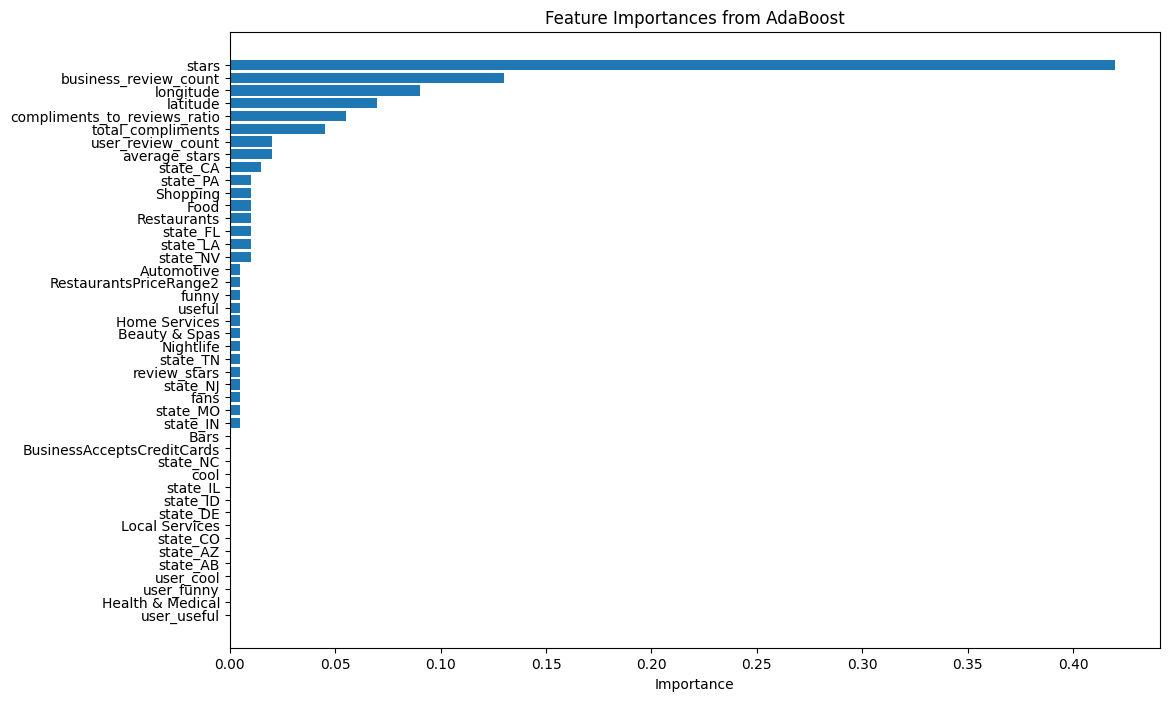

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming you have your model and feature data
# model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100)
# model.fit(X_train, y_train)

# Get feature importances
feature_importances = ada_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from AdaBoost')
plt.show()


## Trying with manual class balancing 🤔

In [40]:

class_0_weight = 2
class_1_weight = 1

weights = np.where(y_train == 0, class_0_weight, class_1_weight)

ada_model = AdaBoostClassifier(n_estimators=200, random_state=42, learning_rate=1.0)
ada_model.fit(X_train, y_train, sample_weight=weights)

y_pred_train = ada_model.predict(X_train)
y_pred_test = ada_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report for Test Set:\n", classification_report(y_test, y_pred_test))

Training Accuracy: 0.8105356204063541
Test Accuracy: 0.8085651405274741

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.50      0.49      0.49     31653
           1       0.88      0.88      0.88    134649

    accuracy                           0.81    166302
   macro avg       0.69      0.69      0.69    166302
weighted avg       0.81      0.81      0.81    166302



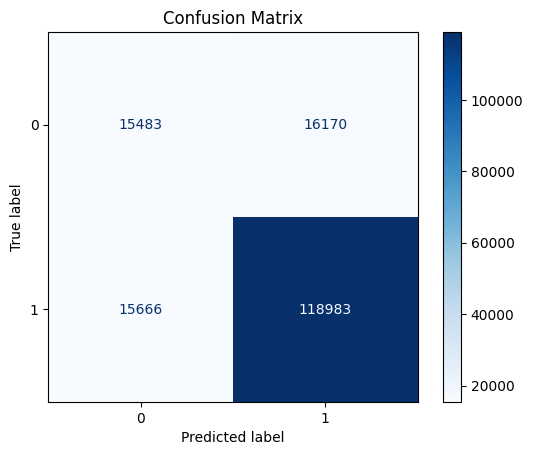

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

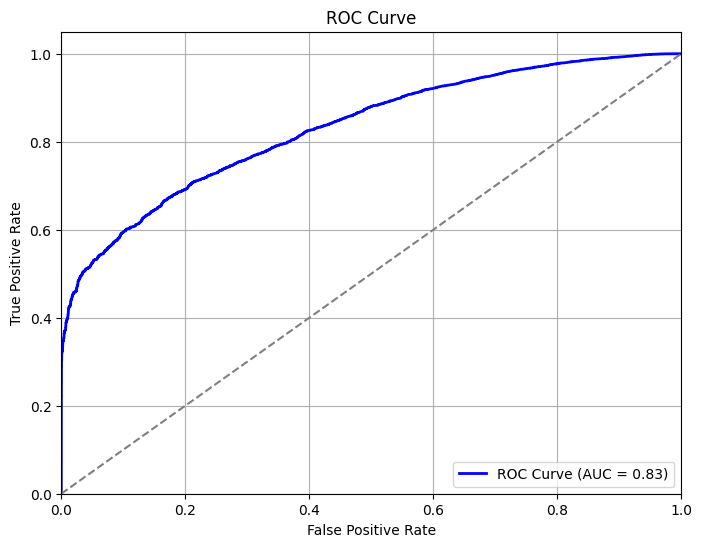

In [42]:
y_proba = ada_model.predict_proba(X_test)[:, 1]  # Probability for class 1
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Trying with three different models using ensembling to see the result 😲

In [62]:
# Ensembling Starts from here 

In [63]:
import joblib
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import joblib

# Load the train and test data from pkl files
X_train = joblib.load('X_train.pkl')
X_test = joblib.load('X_test.pkl')
y_train = joblib.load('y_train.pkl')
y_test = joblib.load('y_test.pkl')

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(233170, 24)
(58324, 24)
(233170, 1)
(58324, 1)


In [65]:
X_train.head()

state  review_count  is_open  BusinessAcceptsCreditCards  \
0    PA           124     True                        True   
1    IN            81     True                        True   
2    PA            53     True                        True   
3    FL           908     True                        True   
4    FL           123     True                        True   

  RestaurantsPriceRange2  Restaurants   Food  Shopping  Home Services  \
0                      2        False  False      True           True   
1                      2        False  False     False          False   
2                      1         True   True     False          False   
3                      2         True  False     False          False   
4                      2         True  False     False          False   

   Beauty & Spas  ...  Automotive  garage  street    lot  valet  useful  \
0          False  ...       False   False   False  False  False   False   
1          False  ...       False   False    True  False  False    True   
2          False  ...       False   False   False   True  False   False   
3          False  ...       False   False    True   True   True    True   
4          False  ...       False   False   False   True  False   False   

   funny   cool  business_stars  review_stars  
0  False  False            True          True  
1  False   True            True          True  
2  False  False            True          True  
3   True   True            True          True  
4  False  False            True          True  

[5 rows x 24 columns]

Model Ensembling

In [67]:
print(X_train.dtypes)
# print(y_train)
# print(y_test.dtypes)
# print(X_test.dtypes)


state                         object
review_count                   int64
is_open                         bool
BusinessAcceptsCreditCards      bool
RestaurantsPriceRange2        object
Restaurants                     bool
Food                            bool
Shopping                        bool
Home Services                   bool
Beauty & Spas                   bool
Nightlife                       bool
Health & Medical                bool
Local Services                  bool
Bars                            bool
Automotive                      bool
garage                          bool
street                          bool
lot                             bool
valet                           bool
useful                          bool
funny                           bool
cool                            bool
business_stars                object
review_stars                  object
dtype: object


In [68]:
object_columns = X_train.select_dtypes(include=['object']).columns
print(f"Object columns: {object_columns}")

Object columns: Index(['state', 'RestaurantsPriceRange2', 'business_stars', 'review_stars'], dtype='object')


In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create ColumnTransformer to apply OneHotEncoder to object columns
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), object_columns)
    ], remainder='passthrough')  # Passthrough for numerical columns

# Transform X_train and X_test using the encoder
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


In [70]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import numpy as np



clf1 = AdaBoostClassifier(n_estimators=200, random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = XGBClassifier(n_estimators=200, random_state=42)

ensemble_model = VotingClassifier(estimators=[
    ('ada', clf1), ('rf', clf2), ('xgb', clf3)], voting='soft')

ensemble_model.fit(X_train_encoded, y_train)

y_pred_train = ensemble_model.predict(X_train_encoded)
y_pred_test = ensemble_model.predict(X_test_encoded)


/Users/atrijoshi/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/atrijoshi/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [71]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report for Test Set:\n", classification_report(y_test, y_pred_test))

Training Accuracy: 0.9982973795942874
Test Accuracy: 0.9949420478705164

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     29147
           1       0.99      1.00      0.99     29177

    accuracy                           0.99     58324
   macro avg       0.99      0.99      0.99     58324
weighted avg       0.99      0.99      0.99     58324



### Accuracy of 99.17%  👏

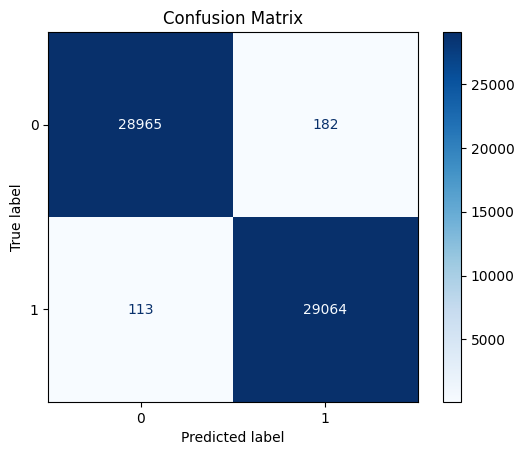

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

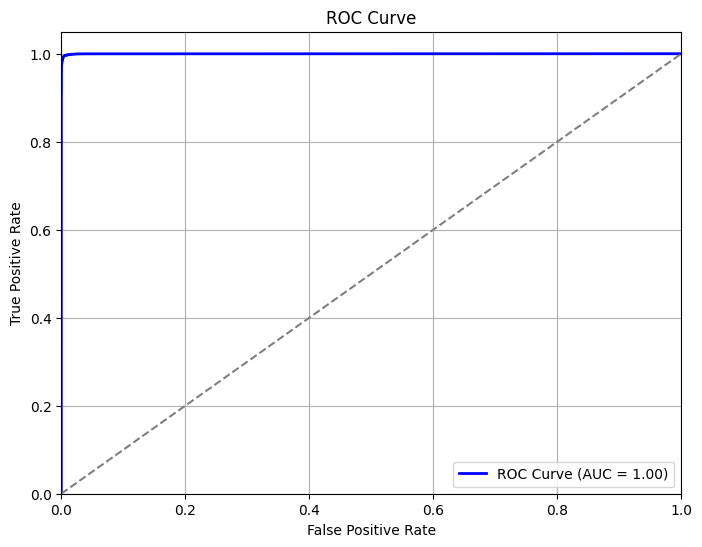

In [73]:
y_proba = ensemble_model.predict_proba(X_test_encoded)[:, 1]  # Probability for class 1
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [35]:
joblib.dump(ensemble_model, 'ensemble_model.pkl')

print("Ensemble Model saved ")

Ensemble Model saved 


In [36]:
joblib.dump(X_test_encoded, 'X_test_encoded.pkl')
joblib.dump(X_train_encoded, 'X_train_encoded.pkl')
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

# We got ROC AUC : 1 . Ensembled Models are confident 🕺

In [ ]:
import numpy as np
import lime
import lime.lime_tabular
import random

# Assuming X_test_encoded is the transformed version of X_test
# and you want to explain a random instance from your test set
random_index = random.randint(0, X_test_encoded.shape[0] - 1)

# Get the random instance to explain
random_data = X_test_encoded[random_index].reshape(1, -1)

# Get the class names (i.e., sentiment labels in your case)
class_names = ['class_0', 'class_1']  # Update with actual class names (e.g., 'positive', 'negative', 'neutral')

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_encoded,  # Use the encoded training data
    feature_names=encoder.get_feature_names_out(),  # Names of features after encoding
    class_names=class_names,
    mode='classification'
)

# Generate explanation for the random instance
exp = explainer.explain_instance(
    random_data[0],  # The instance to explain (a single row)
    ensemble_model.predict_proba,  # Pass the predict_proba method of the model
    num_features=10  # Number of top features to show in the explanation
)

# Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)  # If running in a notebook


In [41]:
X_train_encoded[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 124, True, True, False,
       False, True, True, False, False, False, True, False, False, False,
       False, False, False, False, False, False], dtype=object)

In [47]:
X_test_encoded[0]

array([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 233, True, True, True,
       False, False, False, False, False, False, False, False, False,
       False, False, True, False, False, False, False], dtype=object)

In [45]:
y_train.head()

validated
0          1
1          1
2          1
3          1
4          0

In [46]:
y_test.head()

validated
148398          0
251375          1
161843          1
74798           0
232802          1

In [49]:
X_train.columns

Index(['state', 'review_count', 'is_open', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'Restaurants', 'Food', 'Shopping',
       'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical',
       'Local Services', 'Bars', 'Automotive', 'garage', 'street', 'lot',
       'valet', 'useful', 'funny', 'cool', 'business_stars', 'review_stars'],
      dtype='object')

In [57]:
import lime
import lime.lime_tabular
import numpy as np

user_input = np.array([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 200, True, True, True,
                       False, False, True, False, False, False, True, False, False, 
                       False, False, True, False, False, False, True], dtype=object).reshape(1, -1)

# Step 2: Predict with the ensemble model
predicted_class = ensemble_model.predict(user_input)[0]
prediction_probabilities = ensemble_model.predict_proba(user_input)

print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {prediction_probabilities[0][0]}")



Predicted Class: 0
Prediction Probabilities: 0.8338117009492874


In [58]:
# Step 3: Generate placeholder feature names
# Assuming you have 40 features like in your example, generate feature names automatically
num_features = user_input.shape[1]
feature_names = [f'Feature_{i}' for i in range(1, num_features + 1)]

# Step 4: Initialize LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_encoded,  # Use your training data
    feature_names=feature_names,  # Placeholder feature names
    class_names=['Not Validated', 'Validated'],  # Adjust based on your target classes (0/1)
    mode='classification'
)

In [60]:
# Step 5: Explain the prediction
exp = explainer.explain_instance(
    data_row=user_input.flatten(),  # User input record to explain
    predict_fn=ensemble_model.predict_proba,  # Model's predict_proba function
    num_features=10  # Number of features to display in the explanation
)

# Step 6: Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# If you're not in a notebook environment, you can save the explanation to an HTML file:
# exp.save_to_file('lime_explanation_user_input.html')

# Print explanation for console-based environment
exp.as_list()

[('Feature_35 <= 0.00', -0.05661397702151881),
 ('Feature_38 <= 0.00', -0.04816836612232323),
 ('Feature_12 <= 0.00', -0.021401071791403124),
 ('Feature_34 <= 0.00', -0.015732087793475576),
 ('Feature_8 <= 0.00', 0.013979861766287259),
 ('Feature_29 <= 0.00', -0.012605366378784238),
 ('Feature_40 <= 0.00', -0.012418196489232623),
 ('0.00 < Feature_37 <= 1.00', -0.011514664897041017),
 ('Feature_41 > 0.00', 0.011352854609839228),
 ('Feature_7 <= 0.00', -0.009495012891451814)]

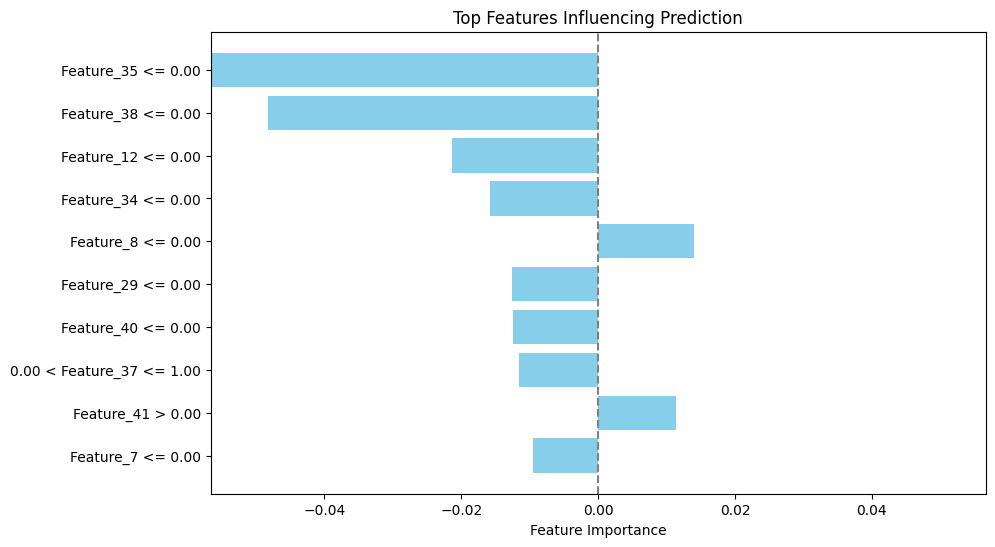

In [61]:
feature_importance = exp.as_list()
features, importances = zip(*feature_importance)

# Step 7: Create a bar chart for the top features
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top Features Influencing Prediction')
plt.axvline(x=0, color='grey', linestyle='--')  # Add a vertical line at x=0
plt.xlim(-max(abs(min(importances)), abs(max(importances))), max(abs(min(importances)), abs(max(importances))))
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()